<a href="https://colab.research.google.com/github/pssn-123/TroubleshootingForprojects/blob/changes/MDP_Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

TypeError: Could not convert phon_R01_S07_1phon_R01_S07_2phon_R01_S07_3phon_R01_S07_4phon_R01_S07_5phon_R01_S07_6phon_R01_S10_1phon_R01_S10_2phon_R01_S10_3phon_R01_S10_4phon_R01_S10_5phon_R01_S10_6phon_R01_S13_1phon_R01_S13_2phon_R01_S13_3phon_R01_S13_4phon_R01_S13_5phon_R01_S13_6phon_R01_S17_1phon_R01_S17_2phon_R01_S17_3phon_R01_S17_4phon_R01_S17_5phon_R01_S17_6phon_R01_S42_1phon_R01_S42_2phon_R01_S42_3phon_R01_S42_4phon_R01_S42_5phon_R01_S42_6phon_R01_S43_1phon_R01_S43_2phon_R01_S43_3phon_R01_S43_4phon_R01_S43_5phon_R01_S43_6phon_R01_S49_1phon_R01_S49_2phon_R01_S49_3phon_R01_S49_4phon_R01_S49_5phon_R01_S49_6phon_R01_S50_1phon_R01_S50_2phon_R01_S50_3phon_R01_S50_4phon_R01_S50_5phon_R01_S50_6 to numeric

Data Pre-Processing

Separating the features & Target

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Model Training

Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


Decision tree


In [ ]:
# prompt: use decision tree to make a model and give accuracy on training and testing data

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier on the training data
decision_tree.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_dt = decision_tree.predict(X_test)

# Calculate the accuracy of the decision tree model on the training data
training_data_accuracy_dt = accuracy_score(Y_train, decision_tree.predict(X_train))

# Calculate the accuracy of the decision tree model on the test data
test_data_accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

# Print the accuracy of the decision tree model on the training and test data
print('Accuracy score of training data using Decision Tree:', training_data_accuracy_dt)
print('Accuracy score of test data using Decision Tree:', test_data_accuracy_dt)


Accuracy score of training data using Decision Tree: 1.0
Accuracy score of test data using Decision Tree: 0.7435897435897436


In [ ]:
# prompt: use naive bayes to make a model and give accuracy on training and testi

from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the Gaussian Naive Bayes classifier on the training data
gnb.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_gnb = gnb.predict(X_test)

# Calculate the accuracy of the Gaussian Naive Bayes model on the training data
training_data_accuracy_gnb = accuracy_score(Y_train, gnb.predict(X_train))

# Calculate the accuracy of the Gaussian Naive Bayes model on the test data
test_data_accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)

# Print the accuracy of the Gaussian Naive Bayes model on the training and test data
print('Accuracy score of training data using Naive Bayes:', training_data_accuracy_gnb)
print('Accuracy score of test data using Naive Bayes:', test_data_accuracy_gnb)


Accuracy score of training data using Naive Bayes: 0.7371794871794872
Accuracy score of test data using Naive Bayes: 0.5897435897435898


In [ ]:
# prompt: use random forest to make a model and give accuracy on training and testi

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier()

# Train the random forest classifier on the training data
random_forest.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_rf = random_forest.predict(X_test)

# Calculate the accuracy of the random forest model on the training data
training_data_accuracy_rf = accuracy_score(Y_train, random_forest.predict(X_train))

# Calculate the accuracy of the random forest model on the test data
test_data_accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

# Print the accuracy of the random forest model on the training and test data
print('Accuracy score of training data using Random Forest:', training_data_accuracy_rf)
print('Accuracy score of test data using Random Forest:', test_data_accuracy_rf)


Accuracy score of training data using Random Forest: 1.0
Accuracy score of test data using Random Forest: 0.8461538461538461


In [ ]:
# prompt: use logistic regression to make a model and give accuracy on training and testi

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Train the logistic regression model on the training data
logistic_regression.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_lr = logistic_regression.predict(X_test)

# Calculate the accuracy of the logistic regression model on the training data
training_data_accuracy_lr = accuracy_score(Y_train, logistic_regression.predict(X_train))

# Calculate the accuracy of the logistic regression model on the test data
test_data_accuracy_lr = accuracy_score(Y_test, Y_pred_lr)

# Print the accuracy of the logistic regression model on the training and test data
print('Accuracy score of training data using Logistic Regression:', training_data_accuracy_lr)
print('Accuracy score of test data using Logistic Regression:', test_data_accuracy_lr)


Accuracy score of training data using Logistic Regression: 0.8782051282051282
Accuracy score of test data using Logistic Regression: 0.8717948717948718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: use voting classifier to make a model and give accuracy on training and testi

from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm.SVC(kernel='linear')),
    ('dt', DecisionTreeClassifier()),
    ('gnb', GaussianNB()),
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression())
], voting='hard')

# Train the voting classifier on the training data
voting_classifier.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_voting = voting_classifier.predict(X_test)

# Calculate the accuracy of the voting classifier on the training data
training_data_accuracy_voting = accuracy_score(Y_train, voting_classifier.predict(X_train))

# Calculate the accuracy of the voting classifier on the test data
test_data_accuracy_voting = accuracy_score(Y_test, Y_pred_voting)

# Print the accuracy of the voting classifier on the training and test data
print('Accuracy score of training data using Voting Classifier:', training_data_accuracy_voting)
print('Accuracy score of test data using Voting Classifier:', test_data_accuracy_voting)


Accuracy score of training data using Voting Classifier: 0.9615384615384616
Accuracy score of test data using Voting Classifier: 0.8205128205128205


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: use Stacking method to make a model and give accuracy on training and testi

from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_classifier = StackingClassifier(estimators=[
    ('svm', svm.SVC(kernel='linear')),
    ('dt', DecisionTreeClassifier()),
    ('gnb', GaussianNB()),
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression())
], final_estimator=LogisticRegression())

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate the accuracy of the stacking classifier on the training data
training_data_accuracy_stacking = accuracy_score(Y_train, stacking_classifier.predict(X_train))

# Calculate the accuracy of the stacking classifier on the test data
test_data_accuracy_stacking = accuracy_score(Y_test, Y_pred_stacking)

# Print the accuracy of the stacking classifier on the training and test data
print('Accuracy score of training data using Stacking Classifier:', training_data_accuracy_stacking)
print('Accuracy score of test data using Stacking Classifier:', test_data_accuracy_stacking)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of training data using Stacking Classifier: 1.0
Accuracy score of test data using Stacking Classifier: 0.8205128205128205


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# prompt: use Gradient Boosting Machine (GBM to make a model and give accuracy on training and testing data

from sklearn.ensemble import GradientBoostingClassifier

# Create a GBM classifier
gbm = GradientBoostingClassifier()

# Train the GBM classifier on the training data
gbm.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred_gbm = gbm.predict(X_test)

# Calculate the accuracy of the GBM model on the training data
training_data_accuracy_gbm = accuracy_score(Y_train, gbm.predict(X_train))

# Calculate the accuracy of the GBM model on the test data
test_data_accuracy_gbm = accuracy_score(Y_test, Y_pred_gbm)

# Print the accuracy of the GBM model on the training and test data
print('Accuracy score of training data using GBM:', training_data_accuracy_gbm)
print('Accuracy score of test data using GBM:', test_data_accuracy_gbm)


Accuracy score of training data using GBM: 1.0
Accuracy score of test data using GBM: 0.8205128205128205


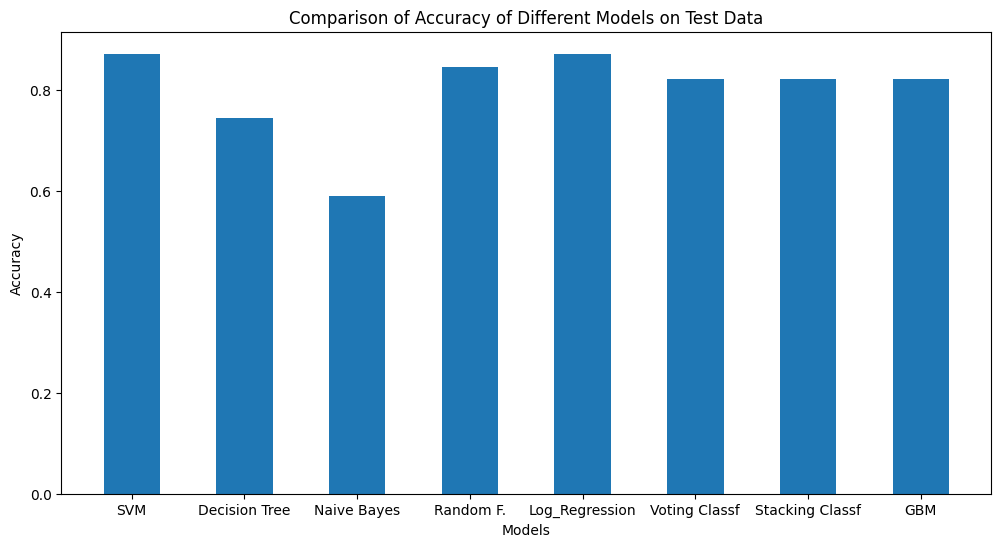

In [ ]:
# prompt: create a chart of accuracy of testing data of every model used based on testing accuracy

import matplotlib.pyplot as plt

models = ['SVM', 'Decision Tree', 'Naive Bayes', 'Random F.', 'Log_Regression', 'Voting Classf', 'Stacking Classf', 'GBM']
accuracies = [test_data_accuracy, test_data_accuracy_dt, test_data_accuracy_gnb, test_data_accuracy_rf, test_data_accuracy_lr, test_data_accuracy_voting, test_data_accuracy_stacking, test_data_accuracy_gbm]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of Different Models on Test Data')
plt.show()


Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
